You have been provided 4 individual data sets. Time period of data is from **31/01/2016 to 31/12/2018**
Below are the list of datasets which are provided for the analysis:
* **Cab_Data.csv** – this file includes details of transaction for 2 cab companies
* **Customer_ID.csv** – this is a mapping table that contains a unique identifier which links the customer’s demographic details
* **Transaction_ID.csv** – this is a mapping table that contains transaction to customer mapping and payment mode
* **City.csv** – this file contains list of US cities, their population and number of cab users

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

In [2]:
#importing Cab_Data.csv
cab = pd.read_csv('/kaggle/input/cabs-fare-data/Cab_Data.csv')
cab.head(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,02-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,07-01-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,03-01-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776


* Transaction ID- unique id for every transaction
* Date of Travel - date when the ride happened
* Company- name of the company which provided the cab for ride
* KM Travelled- distance travlled by cab in KMs
* Price Charged- amount charged to the customer for the ride
* Cost of Trip- actual cost of the trip (no profit or loss is added)

In [3]:
city = pd.read_csv('../input/cabs-fare-data/City.csv')
city.head(5)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


* City
* Population
* Users- number of cab users in the specific city

In [4]:
customer = pd.read_csv('../input/cabs-fare-data/Customer_ID.csv')
customer.head(5)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


* Customer ID- unique customer ID 
* Gender
* Age
* Income - monthly income in USD for cutomer

In [5]:
transaction = pd.read_csv('../input/cabs-fare-data/Transaction_ID.csv')
transaction.head(5)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


* Transaction ID
* Customer ID
* Payment_Mode- mode of payment for the cab ride

In [6]:
datasets = [cab, city, customer, transaction]
datasets_name = ['cab', 'city', 'customer', 'transaction']

In [7]:
#defining some functions
def data_info(dataset, name):
    print(f'For DataSet :{name}')
    print(f'-------------//Shape of dataset- {name} ')
    print(dataset.shape)
    print(f'-------------//Columns in dataset- {name} ')
    print(dataset.columns)
    print(f'-------------//Info for dataset- {name} ')
    print(dataset.info())
    print(f'-------------//Null Values for dataset- {name}')
    print(dataset.isnull().sum())
    print(f'-------------//Description of dataset- {name}')
    print(dataset.describe())
    print('')
    print('')
    print('')
   
    
    
def plot_bar(group, title):
    plt.figure(figsize=(14,6))
    sns.barplot(x=group.index,y=group.values)     
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()
    print(group)
    
def distribution_graph(dataset, title, x, x_label, color):
    plt.figure(figsize=(14,6))
    ax=sns.histplot(data = dataset, x=x,bins=40, color= color)
    plt.title(title)
    plt.ylabel('Frequency')
    plt.xlabel(x_label)

In [8]:
#replacing spaces with '_' in column names
for col in cab.columns:
    if ' ' in col:
        cab = cab.rename(columns={col:col.replace(' ','_')})
for col in customer.columns:
    if ' ' in col:
        customer = customer.rename(columns={col:col.replace(' ','_')})
for col in city.columns:
    if ' ' in col:
        city = city.rename(columns={col:col.replace(' ','_')})
for col in transaction.columns:
    if ' ' in col:
        transaction = transaction.rename(columns={col:col.replace(' ','_')})


<h2 style="color:blue;">cab dataset</h2>

In [9]:
data_info(cab, 'Cab Dataset')

For DataSet :Cab Dataset
-------------//Shape of dataset- Cab Dataset 
(359392, 7)
-------------//Columns in dataset- Cab Dataset 
Index(['Transaction_ID', 'Date_of_Travel', 'Company', 'City', 'KM_Travelled',
       'Price_Charged', 'Cost_of_Trip'],
      dtype='object')
-------------//Info for dataset- Cab Dataset 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction_ID  359392 non-null  int64  
 1   Date_of_Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM_Travelled    359392 non-null  float64
 5   Price_Charged   359392 non-null  float64
 6   Cost_of_Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB
None
-------------//Null Values for dataset- Cab Dataset
Transaction_ID    0
Date_of_Travel    

In [10]:
#converting the date format into standard date format
cab['Date_of_Travel'] = pd.to_datetime(cab['Date_of_Travel'])
cab['Year'] = cab['Date_of_Travel'].dt.year #adding a new 'Year' column
cab['Month'] = cab['Date_of_Travel'].dt.month #adding a new 'Month' column

cab = cab.drop(['Date_of_Travel'], axis =1 )

cab['Profit'] = cab['Price_Charged'] - cab['Cost_of_Trip'] 
cab['ProfitPercentage'] = ((cab['Price_Charged'] - cab['Cost_of_Trip'])/cab['Cost_of_Trip'])*100


In [11]:
cab.replace([np.inf, -np.inf], np.nan)
cab['Profit_per_KM'] = cab['Profit']/ cab['KM_Travelled']
cab.head()

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Year,Month,Profit,ProfitPercentage,Profit_per_KM
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016,8,57.315,18.274427,1.882266
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016,6,23.666,7.067558,0.826904
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016,2,27.568,28.236644,3.049558
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016,7,25.798,7.337273,0.777751
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016,3,16.844,17.227131,1.929439


In [12]:
#getting the counts for Month, Year, Company and City column
month = cab.groupby(['Month']).Transaction_ID.count()
year = cab.groupby(['Year']).Transaction_ID.count()
company = cab.groupby(['Company']).Transaction_ID.count()
city_cab = cab.groupby(['City']).Transaction_ID.count()

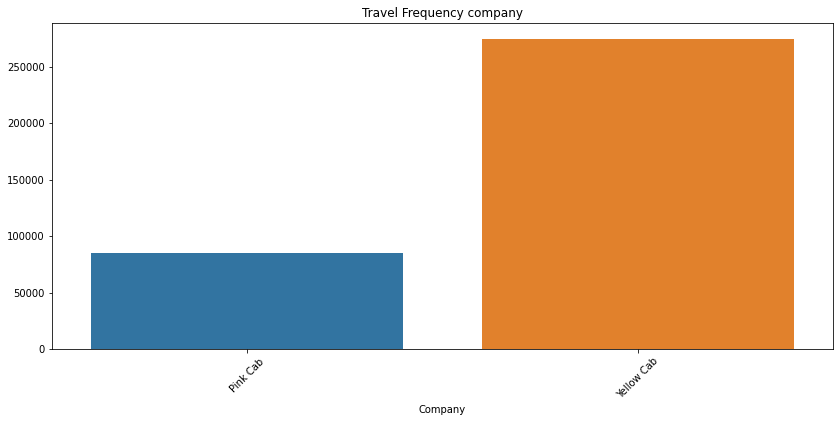

Company
Pink Cab       84711
Yellow Cab    274681
Name: Transaction_ID, dtype: int64


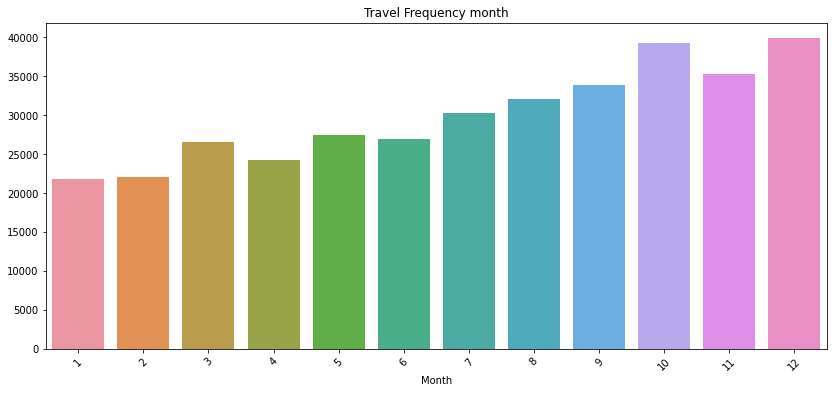

Month
1     21842
2     22031
3     26478
4     24195
5     27459
6     26939
7     30225
8     32038
9     33895
10    39209
11    35217
12    39864
Name: Transaction_ID, dtype: int64


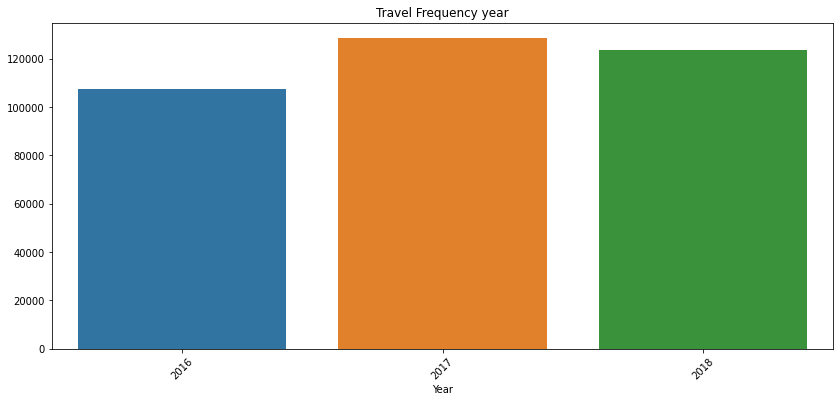

Year
2016    107319
2017    128510
2018    123563
Name: Transaction_ID, dtype: int64


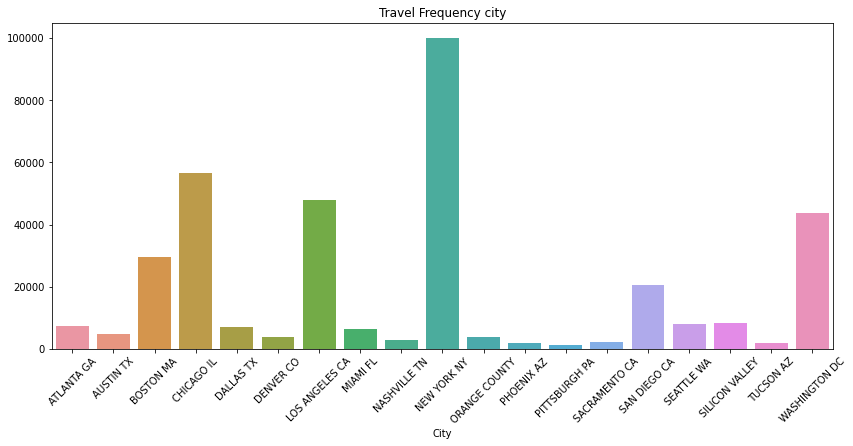

City
ATLANTA GA         7557
AUSTIN TX          4896
BOSTON MA         29692
CHICAGO IL        56625
DALLAS TX          7017
DENVER CO          3825
LOS ANGELES CA    48033
MIAMI FL           6454
NASHVILLE TN       3010
NEW YORK NY       99885
ORANGE COUNTY      3982
PHOENIX AZ         2064
PITTSBURGH PA      1313
SACRAMENTO CA      2367
SAN DIEGO CA      20488
SEATTLE WA         7997
SILICON VALLEY     8519
TUCSON AZ          1931
WASHINGTON DC     43737
Name: Transaction_ID, dtype: int64


In [13]:
#visually displaying the counts with the tabluar data below it

groups = [company, month, year,city_cab]
names = ['company', 'month', 'year','city']
i=0    
for group in groups:
    title = 'Travel Frequency ' + names[i]
    plot_bar(group, title)
    i +=1

<h4 style="color:green;">Yellow Cab is used more than Pink Cab. 76.4% of the rides are by Yellow Cab </h4>
<h4 style="color:green;">November and December (10 and 12) have the most rides. Jan and Feb being the least</h4>
<h4 style="color:green;">2018 has the highest cab rides but the 'Year" column approximately has fairly distributed data </h4>
<h4 style="color:green;">NEW YORK NY has the highest number of rides vs PITTSBURGH PA with lowest  </h4>

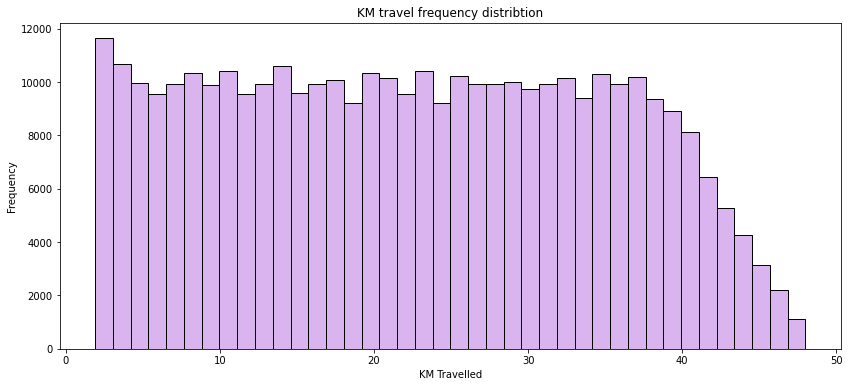

In [14]:
distribution_graph(cab, 'KM travel frequency distribtion', 'KM_Travelled', 'KM Travelled', '#ce9be9' )

<h4 style="color:green;">After 40KM there is gradual linear decrease in number of rides</h4>

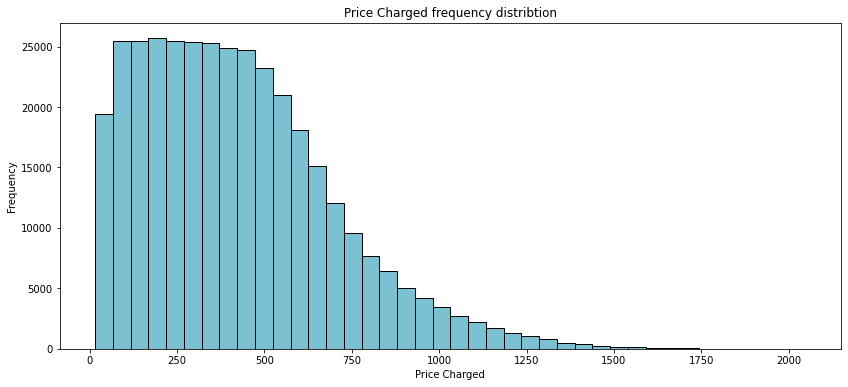

In [15]:
distribution_graph(cab, 'Price Charged frequency distribtion', 'Price_Charged', 'Price Charged', '#50acc3' )

<h4 style="color:green;">After 400, there is an exponential decrease in number of rides</h4>

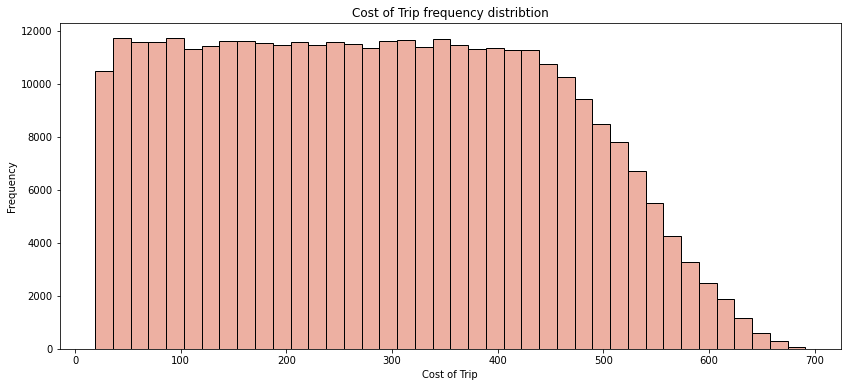

In [16]:
distribution_graph(cab, 'Cost of Trip frequency distribtion', 'Cost_of_Trip', 'Cost of Trip', '#e79683' )

<h4 style="color:green;">After around 420 there is linear decrease in number of rides  till it reaches 0 around700</h4>

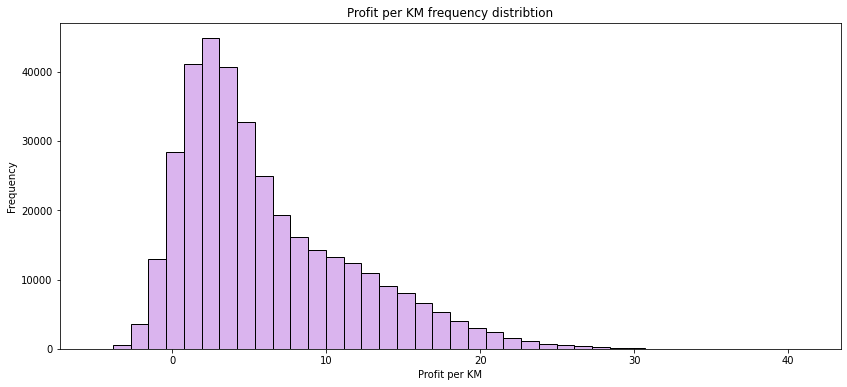

In [17]:
distribution_graph(cab, 'Profit per KM frequency distribtion', 'Profit_per_KM', 'Profit per KM', '#ce9be9' )

<h4 style="color:green;">Profit per KM is skewed towards right with few outliers</h4>

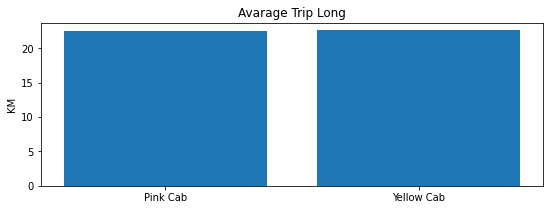

            KM_Travelled
Company                 
Pink Cab       22.559917
Yellow Cab     22.569517


In [18]:
new = cab[["Company", "KM_Travelled"]]
new_df = (new.groupby("Company").mean()).sort_values(by="KM_Travelled")

#visualization
plt.figure(figsize = (9,3))
plt.bar(new_df.index,new_df["KM_Travelled"])
plt.ylabel("KM")
plt.title("Avarage Trip Long")
plt.show()

print(new_df)


<h4 style="color:green;">Both the companies have same average KM travelled</h4>

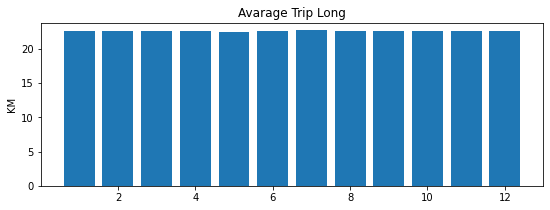

       KM_Travelled
Month              
5         22.405801
9         22.527838
8         22.537612
6         22.554316
3         22.555264
2         22.569511
4         22.581677
10        22.593497
11        22.597415
1         22.603980
12        22.604417
7         22.653659


In [19]:
new2 = cab[["Month", "KM_Travelled"]]
new_df2 = (new2.groupby("Month").mean()).sort_values(by="KM_Travelled")

#visualization
plt.figure(figsize = (9,3))
plt.bar(new_df2.index,new_df2["KM_Travelled"])
plt.ylabel("KM")
plt.title("Avarage Trip Long")
plt.show()

print(new_df2)

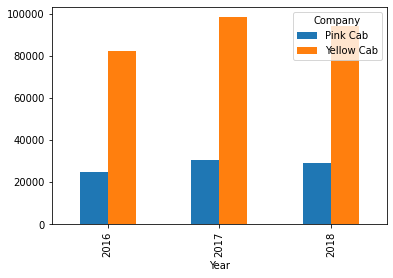

Company  Pink Cab  Yellow Cab
Year                         
2016        25080       82239
2017        30321       98189
2018        29310       94253


In [20]:
counts = cab.groupby(['Year','Company']).Transaction_ID.count().unstack()
ax = counts.plot(kind='bar',stacked = False)
plt.show()
print(counts)

<h4 style="color:green;">On an average Pink cab contributes to 23% in total cab count for all three years</h4>

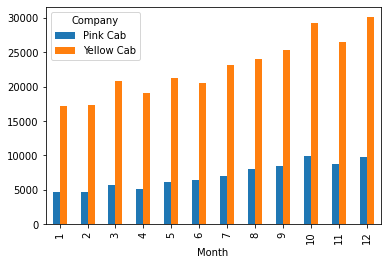

Company  Pink Cab  Yellow Cab
Month                        
1            4734       17108
2            4693       17338
3            5724       20754
4            5118       19077
5            6150       21309
6            6371       20568
7            7048       23177
8            8011       24027
9            8518       25377
10           9936       29273
11           8679       26538
12           9729       30135


In [21]:
counts = cab.groupby(['Month','Company']).Transaction_ID.count().unstack()
ax = counts.plot(kind='bar',stacked = False)
plt.show()
print(counts)

<h4 style="color:green;">The percantage contribution of Pink Cab in number of cabs remain more or less same for all the months</h4>

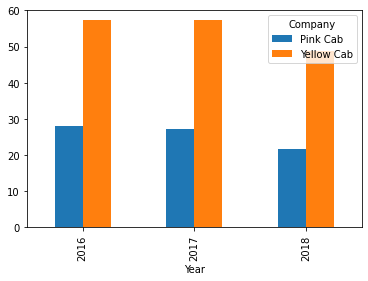

Company   Pink Cab  Yellow Cab
Year                          
2016     27.910304   57.214209
2017     27.319440   57.244999
2018     21.727509   48.679429


In [22]:
counts = cab.groupby(['Year','Company']).ProfitPercentage.mean().unstack()
ax = counts.plot(kind='bar',stacked = False)
plt.show()
print(counts)

<h4 style="color:green;">Mean Profit for Pink Cab on an Average for the three years is around 17-18</h4>
<h4 style="color:green;">Mean Profit for Yellow Cab on an Average for the three years is around 28-31</h4>

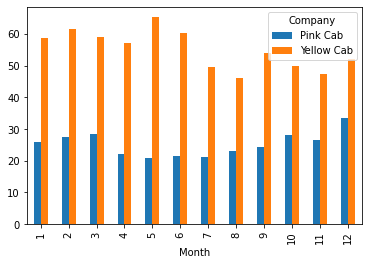

Company   Pink Cab  Yellow Cab
Month                         
1        25.788607   58.576844
2        27.499876   61.410604
3        28.448711   58.920636
4        22.125875   57.052153
5        20.698423   65.309188
6        21.470962   60.316722
7        21.302683   49.538838
8        23.070940   46.064588
9        24.195375   54.085749
10       27.928672   49.722187
11       26.574888   47.300809
12       33.371083   51.953357


In [23]:
counts = cab.groupby(['Month','Company']).ProfitPercentage.mean().unstack()
ax = counts.plot(kind='bar',stacked = False)
plt.show()
print(counts)

<h4 style="color:green;">Highest Profit Percentage of Pink Cab was for the months- March and December, lowest for the months- June and July </h4>
<h4 style="color:green;">Highest Profit Percentage of Yellow Cab was for the months- May, Feb Jan and June, lowest for the months- August and July</h4>

In [24]:
counts = cab.groupby(['Year','Company']).Profit.mean().unstack()
print(counts)
counts = cab.groupby(['Month','Company']).ProfitPercentage.mean().unstack()
print(counts)

Company   Pink Cab  Yellow Cab
Year                          
2016     68.321819  169.347821
2017     67.070839  168.817057
2018     53.229689  143.416122
Company   Pink Cab  Yellow Cab
Month                         
1        25.788607   58.576844
2        27.499876   61.410604
3        28.448711   58.920636
4        22.125875   57.052153
5        20.698423   65.309188
6        21.470962   60.316722
7        21.302683   49.538838
8        23.070940   46.064588
9        24.195375   54.085749
10       27.928672   49.722187
11       26.574888   47.300809
12       33.371083   51.953357


<h4 style="color:green;">Unlike Profit Percentage highest profit average of Pink Cab is in moth of December and lowest from May to July</h4>
<h4 style="color:green;">Unlike Profit Percentage highest profit average of Yellow Cab is in moth of Jan and Feb and lowest for August</h4>

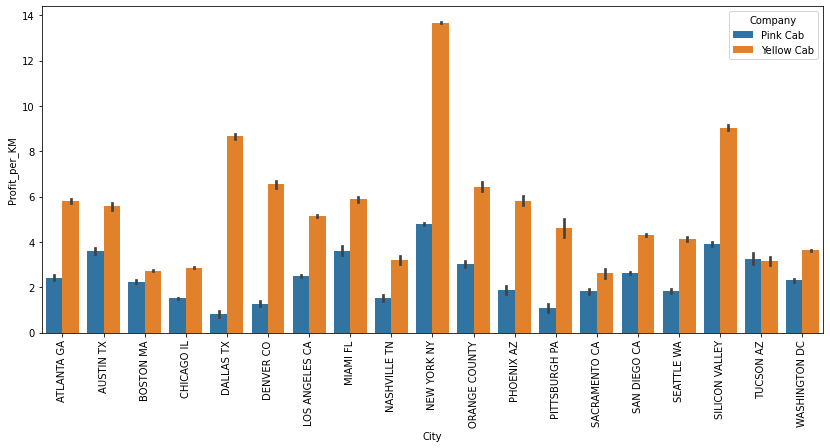

In [25]:
df = cab.groupby(['City', 'Company']).agg(Profit_per_KM = ("Profit_per_KM", 'mean'))
df = cab.reset_index()
dims = (14, 6)
fig, ax = plt.subplots(figsize= dims)
# plot barplot
g = sns.barplot(x="City", y="Profit_per_KM", hue="Company", ax=ax, data=df);
var = g.set_xticklabels(g.get_xticklabels(), rotation=90)

<h4 style="color:green;">In the above graph of Profit per KM, New York yields highest profits in terms of distance for both the companies.</h4>
<h4 style="color:green;">Dallas has lowest value in terms of profit per km for Pink Cab, and same goes for Sacramento for Yellow Cab </h4>

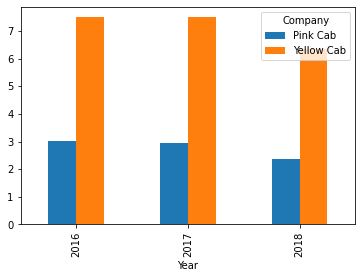

Company  Pink Cab  Yellow Cab
Year                         
2016     3.026813    7.489847
2017     2.962883    7.494612
2018     2.350447    6.364805


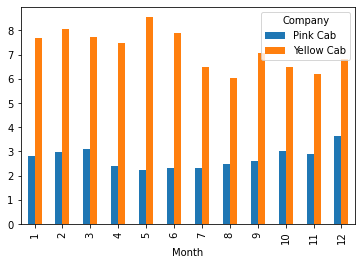

Company  Pink Cab  Yellow Cab
Month                        
1        2.793438    7.665865
2        2.979268    8.044605
3        3.092925    7.714993
4        2.393796    7.466042
5        2.234797    8.552041
6        2.320152    7.897677
7        2.303050    6.478925
8        2.496543    6.022029
9        2.620842    7.080664
10       3.024953    6.504155
11       2.884635    6.183048
12       3.629052    6.798749


In [26]:
counts = cab.groupby(['Year','Company']).Profit_per_KM.mean().unstack()
ax = counts.plot(kind='bar',stacked = False)
plt.show()
print(counts)

counts = cab.groupby(['Month','Company']).Profit_per_KM.mean().unstack()
ax = counts.plot(kind='bar',stacked = False)
plt.show()
print(counts)

<h4 style="color:green;">Average distance travelled is constant with time over all three years and around 12 months</h4>

<h2 style="color:blue;">customer dataset</h2>

In [27]:
customer.head()

,Customer_ID,Gender,Age,Income_(USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [28]:
customer = customer.rename(columns={'Income_(USD/Month)': 'Income_per_Month'})

In [29]:
data_info(customer, 'Customer Dataset')

For DataSet :Customer Dataset
-------------//Shape of dataset- Customer Dataset 
(49171, 4)
-------------//Columns in dataset- Customer Dataset 
Index(['Customer_ID', 'Gender', 'Age', 'Income_per_Month'], dtype='object')
-------------//Info for dataset- Customer Dataset 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Customer_ID       49171 non-null  int64 
 1   Gender            49171 non-null  object
 2   Age               49171 non-null  int64 
 3   Income_per_Month  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None
-------------//Null Values for dataset- Customer Dataset
Customer_ID         0
Gender              0
Age                 0
Income_per_Month    0
dtype: int64
-------------//Description of dataset- Customer Dataset
        Customer_ID           Age  Income_per_Month
count  49171.000000  49

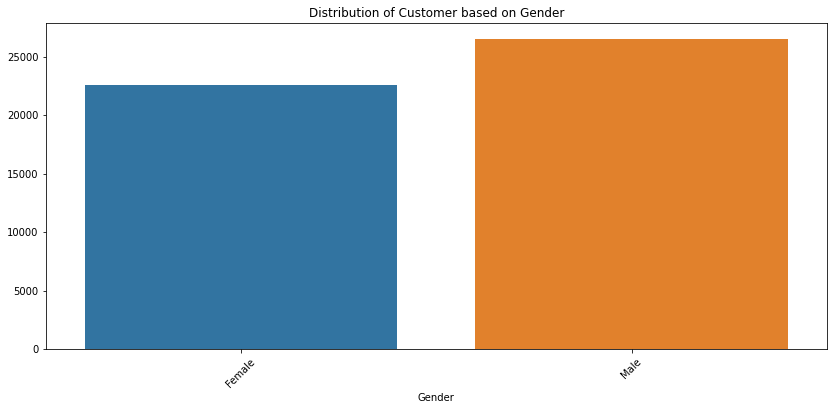

Gender
Female    22609
Male      26562
Name: Customer_ID, dtype: int64


In [30]:
gender = customer.groupby(['Gender']).Customer_ID.count()
plot_bar(gender, 'Distribution of Customer based on Gender')

<h4 style="color:green;">We have more number of male passengers/customers</h4>

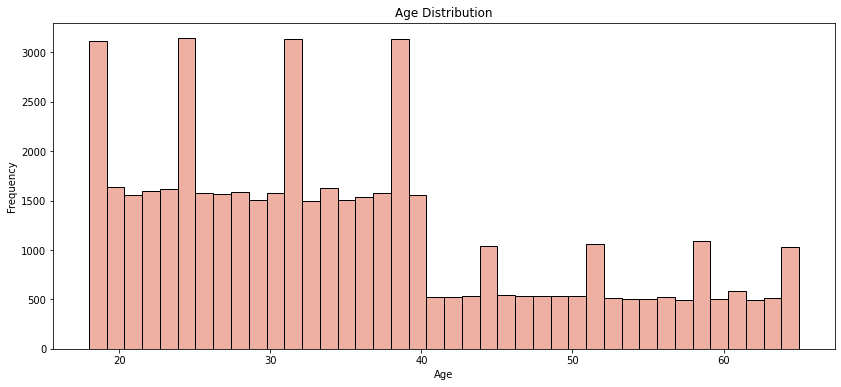

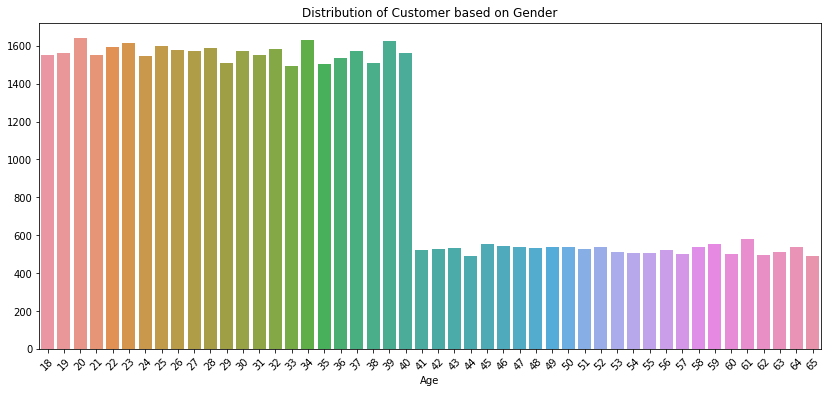

Age
18    1551
19    1561
20    1641
21    1554
22    1596
23    1615
24    1547
25    1597
26    1577
27    1571
28    1588
29    1511
30    1573
31    1549
32    1585
33    1495
34    1629
35    1503
36    1534
37    1575
38    1512
39    1624
40    1561
41     523
42     526
43     532
44     492
45     551
46     540
47     539
48     533
49     539
50     538
51     525
52     539
53     510
54     506
55     504
56     521
57     498
58     536
59     552
60     501
61     580
62     497
63     512
64     536
65     492
Name: Customer_ID, dtype: int64


In [31]:
distribution_graph(customer, 'Age Distribution', 'Age', 'Age', '#e79683' )
age = customer.groupby(['Age']).Customer_ID.count()
plot_bar(age, 'Distribution of Customer based on Gender')

<h4 style="color:green;">After the age og 40 there is a sudden drop in number of passengers. People younger than 40 form a larger part of customers</h4>

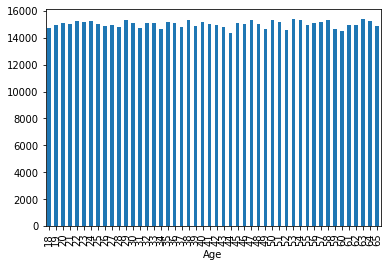

Max Income in the table is  35000
Min Income in the table is  2000


In [32]:
counts = customer.groupby(['Age']).Income_per_Month.mean()
ax = counts.plot(kind='bar',stacked = False)
plt.show()

print('Max Income in the table is ',customer['Income_per_Month'].max())
print('Min Income in the table is ',customer['Income_per_Month'].min())

<h4 style="color:green;">Average income is constant amongst our customers for all ages</h4>

In [33]:
print('\n\nMean Income based on Gender and Age') 
print(customer.groupby(['Gender','Age']).Income_per_Month.mean())



Mean Income based on Gender and Age
Gender  Age
Female  18     14559.172554
        19     14943.423410
        20     15117.543860
        21     15172.203812
        22     15094.283444
                   ...     
Male    61     15027.250000
        62     14995.261364
        63     15624.091549
        64     14779.901695
        65     14816.531250
Name: Income_per_Month, Length: 96, dtype: float64


<h4 style="color:green;">Average Income is almost same (14k to 15k) for each age and for both males and females</h4>

<h2 style="color:blue;">transaction dataset</h2>

In [34]:
transaction.head()

,Transaction_ID,Customer_ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [35]:
data_info(transaction, 'Transaction Dataset')

For DataSet :Transaction Dataset
-------------//Shape of dataset- Transaction Dataset 
(440098, 3)
-------------//Columns in dataset- Transaction Dataset 
Index(['Transaction_ID', 'Customer_ID', 'Payment_Mode'], dtype='object')
-------------//Info for dataset- Transaction Dataset 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction_ID  440098 non-null  int64 
 1   Customer_ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB
None
-------------//Null Values for dataset- Transaction Dataset
Transaction_ID    0
Customer_ID       0
Payment_Mode      0
dtype: int64
-------------//Description of dataset- Transaction Dataset
       Transaction_ID    Customer_ID
count    4.400980e+05  440098.000000
mean     1.022006e+07   23619.513120
std      1.270455e+05   

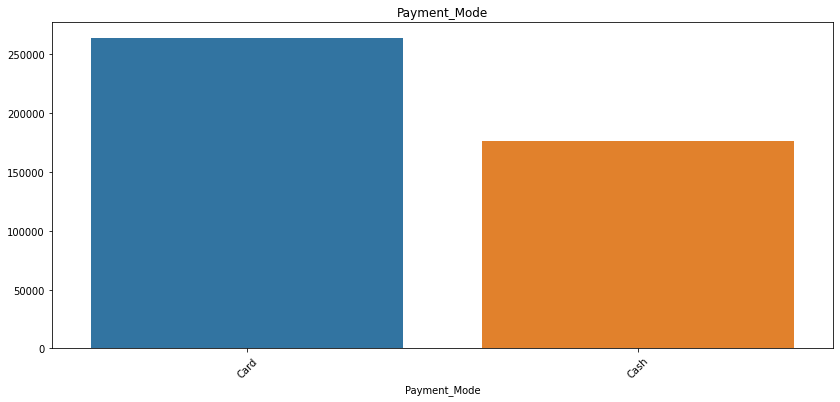

Payment_Mode
Card    263991
Cash    176107
Name: Transaction_ID, dtype: int64


In [36]:
payment_mode = transaction.groupby(['Payment_Mode']).Transaction_ID.count()
plot_bar(payment_mode, 'Payment_Mode')

<h4 style="color:green;">Preferred Mode of transaction is Card, customers use card almost 60% during payment</h4>

<h2 style="color:blue;">city dataset</h2>

In [37]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [38]:
data_info(city, 'City Dataset')

For DataSet :City Dataset
-------------//Shape of dataset- City Dataset 
(20, 3)
-------------//Columns in dataset- City Dataset 
Index(['City', 'Population', 'Users'], dtype='object')
-------------//Info for dataset- City Dataset 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes
None
-------------//Null Values for dataset- City Dataset
City          0
Population    0
Users         0
dtype: int64
-------------//Description of dataset- City Dataset
                City   Population    Users
count             20           20       20
unique            20           20       20
top     NASHVILLE TN   1,595,037    6,133 
freq               1            1        1





In [39]:
#Feature Engineering
city['Population'] = city["Population"].str.strip().str.replace(",","") 
city['Users'] = city["Users"].str.strip().str.replace(",","")
city.head(3)

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132


In [40]:
population = list(city["Population"].str.strip().str.replace(",",""))
city['Population'] = population
population = []
for i in city['Population']:
    i = float(i)
    population.append(i)
city['Population'] = population

In [41]:
users = list(city["Users"].str.strip().str.replace(",",""))
city['Users'] = users
users=[]
for i in city['Users']:
    i = float(i)
    users.append(i)
city['Users'] = users

In [42]:
#adding a new feature PercentageUser
city['PercentageUser'] = (city['Users']/ city['Population'])*100

In [43]:
city.head()

,City,Population,Users,PercentageUser
0,NEW YORK NY,8405837.0,302149.0,3.594514
1,CHICAGO IL,1955130.0,164468.0,8.412126
2,LOS ANGELES CA,1595037.0,144132.0,9.036279
3,MIAMI FL,1339155.0,17675.0,1.319862
4,SILICON VALLEY,1177609.0,27247.0,2.313756


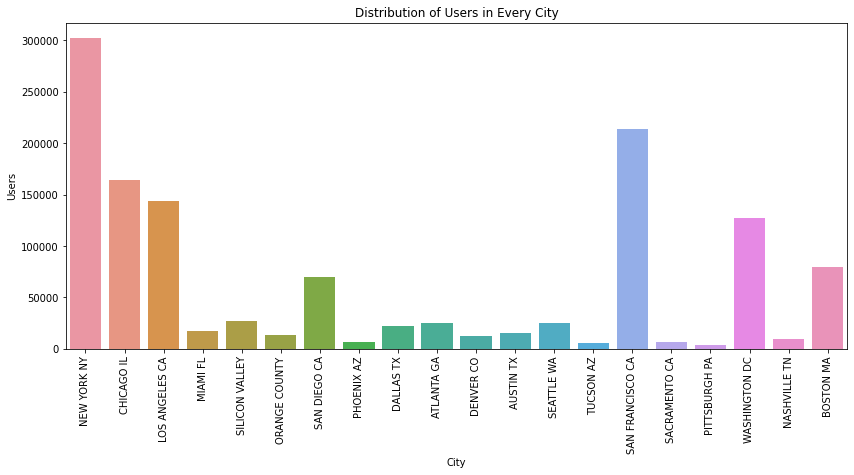

In [44]:
plt.figure(figsize=(14,6))
sns.barplot(x= city.City, y=city.Users)     
plt.title('Distribution of Users in Every City')
plt.xticks(rotation=90)
plt.show()


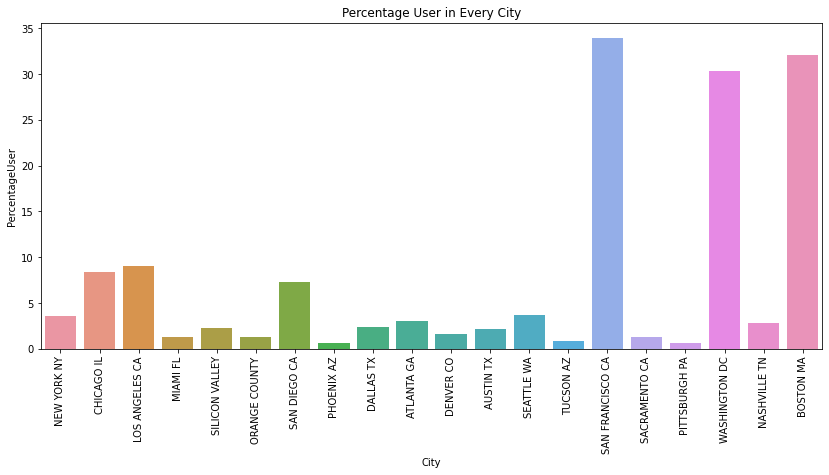

In [45]:
plt.figure(figsize=(14,6))
sns.barplot(x= city.City, y=city.PercentageUser)     
plt.title('Percentage User in Every City')
plt.xticks(rotation=90)
plt.show()

<h4 style="color:green;">Users and Percentage of users shows no relation between one another. Highest number of users is in NEW YORK NY but highest number of percenatge users is in SAN FRANCISCO CA</h4>

<h2 style="color:blue;">master dataset</h2>

In [46]:
left = cab.set_index(['Transaction_ID'])
right = transaction.set_index(['Transaction_ID'])
masterdata = left.join(right)
left = masterdata.set_index([masterdata.index,'Customer_ID'])
right = customer.set_index(['Customer_ID'])
masterdata = left.join(right)
masterdata = masterdata.reset_index()
masterdata.head()

,Transaction_ID,Customer_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Year,Month,Profit,ProfitPercentage,Profit_per_KM,Payment_Mode,Gender,Age,Income_per_Month
0,10000011,29290,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016,8,57.315,18.274427,1.882266,Card,Male,28,10813
1,10000012,27703,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016,6,23.666,7.067558,0.826904,Card,Male,27,9237
2,10000013,28712,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016,2,27.568,28.236644,3.049558,Cash,Male,53,11242
3,10000014,28020,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016,7,25.798,7.337273,0.777751,Cash,Male,23,23327
4,10000015,27182,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016,3,16.844,17.227131,1.929439,Card,Male,33,8536


In [47]:
data_info(masterdata, 'Master Data')

For DataSet :Master Data
-------------//Shape of dataset- Master Data 
(359392, 16)
-------------//Columns in dataset- Master Data 
Index(['Transaction_ID', 'Customer_ID', 'Company', 'City', 'KM_Travelled',
       'Price_Charged', 'Cost_of_Trip', 'Year', 'Month', 'Profit',
       'ProfitPercentage', 'Profit_per_KM', 'Payment_Mode', 'Gender', 'Age',
       'Income_per_Month'],
      dtype='object')
-------------//Info for dataset- Master Data 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    359392 non-null  int64  
 1   Customer_ID       359392 non-null  int64  
 2   Company           359392 non-null  object 
 3   City              359392 non-null  object 
 4   KM_Travelled      359392 non-null  float64
 5   Price_Charged     359392 non-null  float64
 6   Cost_of_Trip      359392 non-null  float64
 7   Year 

In [48]:
data = masterdata.drop(['Transaction_ID', 'Customer_ID'], axis=1)

In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["Company"] = le.fit_transform(data["Company"])
data["Gender"] = le.fit_transform(data["Gender"])
data["City"] = le.fit_transform(data["City"])
data["Payment_Mode"] = le.fit_transform(data["Payment_Mode"])
data

,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Year,Month,Profit,ProfitPercentage,Profit_per_KM,Payment_Mode,Gender,Age,Income_per_Month
0,0,0,30.45,370.95,313.6350,2016,8,57.3150,18.274427,1.882266,0,1,28,10813
1,0,0,28.62,358.52,334.8540,2016,6,23.6660,7.067558,0.826904,0,1,27,9237
2,0,0,9.04,125.20,97.6320,2016,2,27.5680,28.236644,3.049558,1,1,53,11242
3,0,0,33.17,377.40,351.6020,2016,7,25.7980,7.337273,0.777751,1,1,23,23327
4,0,0,8.73,114.62,97.7760,2016,3,16.8440,17.227131,1.929439,0,1,33,8536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,1,18,4.80,69.24,63.3600,2018,8,5.8800,9.280303,1.225000,1,1,24,15651
359388,1,18,8.40,113.75,106.8480,2018,4,6.9020,6.459644,0.821667,1,1,32,6528
359389,1,18,27.75,437.07,349.6500,2018,5,87.4200,25.002145,3.150270,1,1,56,7966
359390,1,18,8.80,146.19,114.0480,2018,5,32.1420,28.182870,3.652500,0,1,32,6423


In [50]:
corr = data.corr()
corr

,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Year,Month,Profit,ProfitPercentage,Profit_per_KM,Payment_Mode,Gender,Age,Income_per_Month
Company,1.000000,0.002109,0.000333,0.227986,0.133713,-0.003287,-0.031128,0.258426,0.286510,0.331957,-0.001026,0.017279,0.000630,-0.000712
City,0.002109,1.000000,0.000471,0.037286,0.000776,-0.000830,-0.005856,0.063052,0.080804,0.079695,-0.000885,-0.011733,-0.008872,-0.008725
KM_Travelled,0.000333,0.000471,1.000000,0.835753,0.981848,-0.001072,0.001033,0.462768,-0.000417,-0.000538,-0.000766,-0.001350,-0.000369,-0.000544
Price_Charged,0.227986,0.037286,0.835753,1.000000,0.859812,-0.036409,-0.036288,0.864154,0.463584,0.473222,0.000226,0.012661,-0.003084,0.003228
Cost_of_Trip,0.133713,0.000776,0.981848,0.859812,1.000000,-0.001773,-0.002720,0.486056,0.018536,0.031053,-0.000898,0.000495,-0.000189,-0.000633
Year,-0.003287,-0.000830,-0.001072,-0.036409,-0.001773,1.000000,-0.007440,-0.060567,-0.077770,-0.076459,-0.000870,-0.012758,-0.000579,-0.001617
Month,-0.031128,-0.005856,0.001033,-0.036288,-0.002720,-0.007440,1.000000,-0.059428,-0.074669,-0.078192,-0.001861,-0.004578,-0.000095,0.000536
Profit,0.258426,0.063052,0.462768,0.864154,0.486056,-0.060567,-0.059428,1.000000,0.775171,0.779330,0.001273,0.021182,-0.005093,0.006148
ProfitPercentage,0.286510,0.080804,-0.000417,0.463584,0.018536,-0.077770,-0.074669,0.775171,1.000000,0.994458,0.002032,0.025711,-0.006606,0.008196
Profit_per_KM,0.331957,0.079695,-0.000538,0.473222,0.031053,-0.076459,-0.078192,0.779330,0.994458,1.000000,0.001932,0.026128,-0.006428,0.008159


<AxesSubplot:>

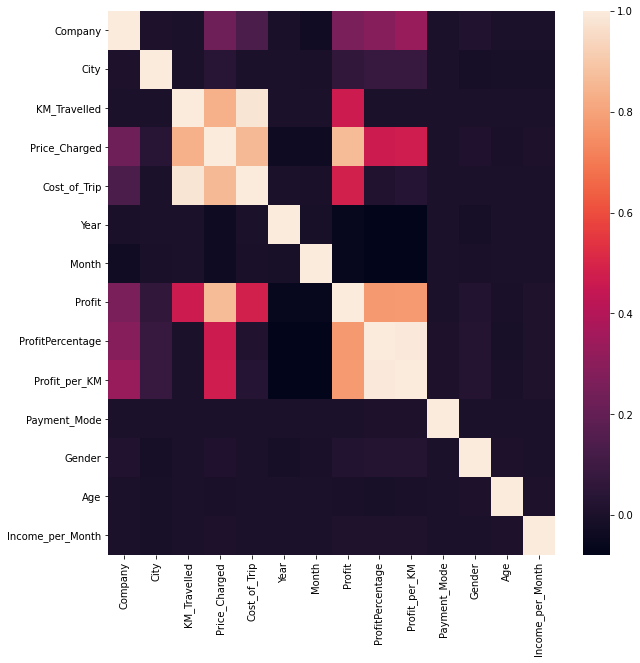

In [51]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, ax=ax)

<h4 style="color:green;">List of highly correlated attributes</h4>

* KM_Travelled and Price_Charged
* KM_Travelled and Cost_of_Trip
* Price_Charged and Cost_of_Trip
* Profit and ProfitPercentage


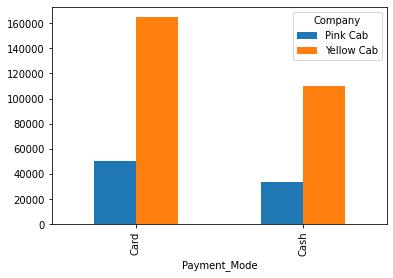

Company       Pink Cab  Yellow Cab
Payment_Mode                      
Card             50719      164785
Cash             33992      109896


In [52]:
counts = masterdata.groupby(['Payment_Mode','Company']).Transaction_ID.count().unstack()
ax = counts.plot(kind='bar',stacked = False)
plt.show()
print(counts)

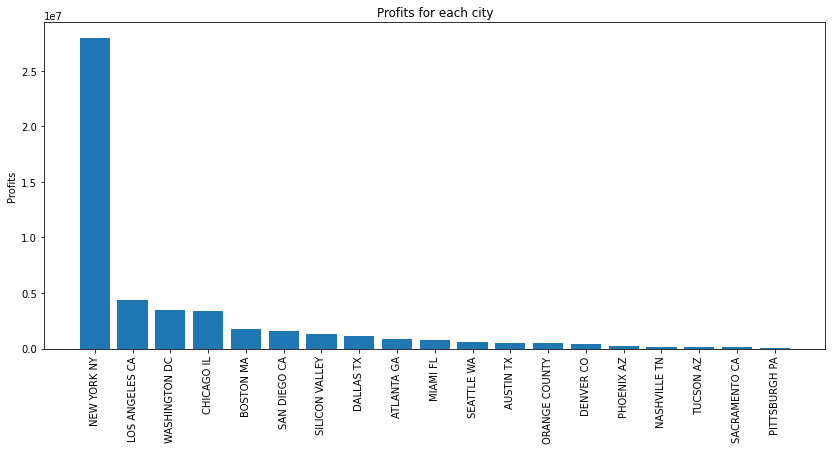

                   Profits
City                      
NEW YORK NY     27962555.0
LOS ANGELES CA   4411709.0
WASHINGTON DC    3492870.0
CHICAGO IL       3387313.0
BOSTON MA        1768719.0
SAN DIEGO CA     1587163.0
SILICON VALLEY   1316705.0
DALLAS TX        1128733.0
ATLANTA GA        842433.0
MIAMI FL          758301.0
SEATTLE WA        604685.0
AUSTIN TX         526701.0
ORANGE COUNTY     457002.0
DENVER CO         397585.0
PHOENIX AZ        192941.0
NASHVILLE TN      149532.0
TUCSON AZ         140261.0
SACRAMENTO CA     117326.0
PITTSBURGH PA      85166.0


In [53]:
price = np.array(cab["Price_Charged"])
cost = np.array(cab["Cost_of_Trip"])
profit = np.subtract(price,cost)
new = zip(cab["City"],profit)
profit_df = (pd.DataFrame(new,columns = ["City","Profits"]).groupby("City").sum()).sort_values(by = "Profits",ascending=False)
new_df = profit_df.round()

plt.figure(figsize = (14,6))
plt.bar(new_df.index,new_df.Profits)
plt.xticks(rotation="90")
plt.ylabel("Profits")
plt.title("Profits for each city")
plt.show()

print(new_df)

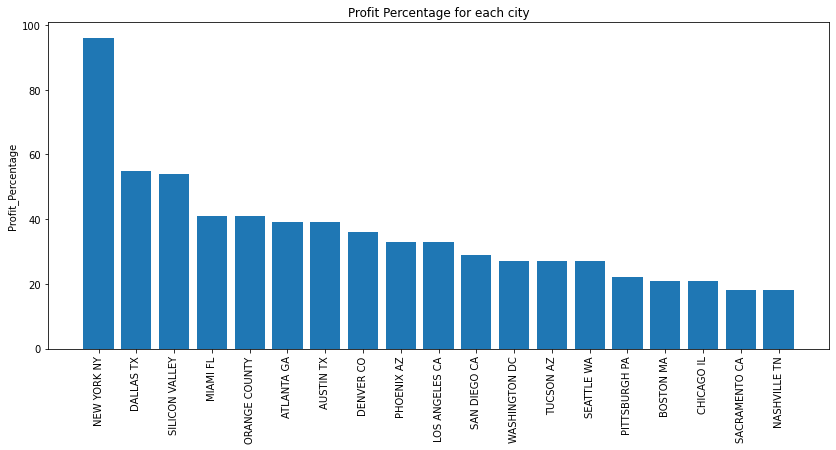

                Profit_Percentage
City                             
NEW YORK NY                  96.0
DALLAS TX                    55.0
SILICON VALLEY               54.0
MIAMI FL                     41.0
ORANGE COUNTY                41.0
ATLANTA GA                   39.0
AUSTIN TX                    39.0
DENVER CO                    36.0
PHOENIX AZ                   33.0
LOS ANGELES CA               33.0
SAN DIEGO CA                 29.0
WASHINGTON DC                27.0
TUCSON AZ                    27.0
SEATTLE WA                   27.0
PITTSBURGH PA                22.0
BOSTON MA                    21.0
CHICAGO IL                   21.0
SACRAMENTO CA                18.0
NASHVILLE TN                 18.0


In [54]:
profitpercentage = np.array(cab["ProfitPercentage"])
new = zip(cab["City"],profitpercentage)
profitpercent_df = (pd.DataFrame(new,columns = ["City","Profit_Percentage"]).groupby("City").mean()).sort_values(by = "Profit_Percentage",ascending=False)
new_df = profitpercent_df.round()

plt.figure(figsize = (14,6))
plt.bar(new_df.index,new_df.Profit_Percentage)
plt.xticks(rotation="90")
plt.ylabel("Profit_Percentage")
plt.title("Profit Percentage for each city")
plt.show()

print(new_df)

<h4 style="color:green;">Above graphs represent City wise Profits and Profit Percentage trend</h4>

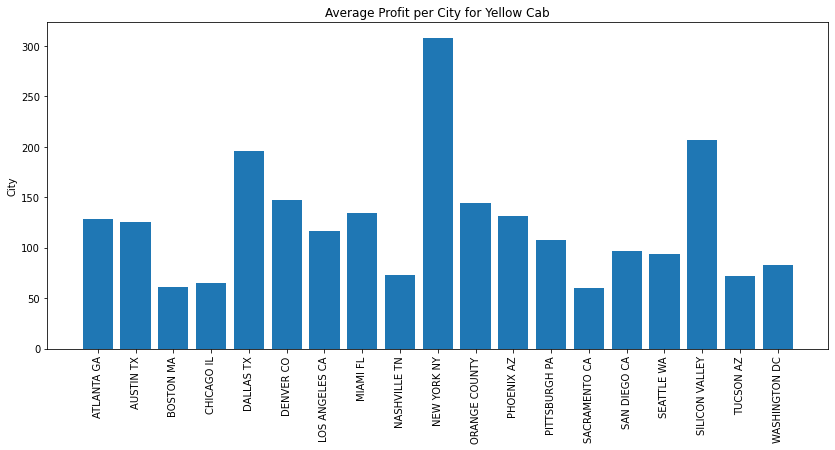

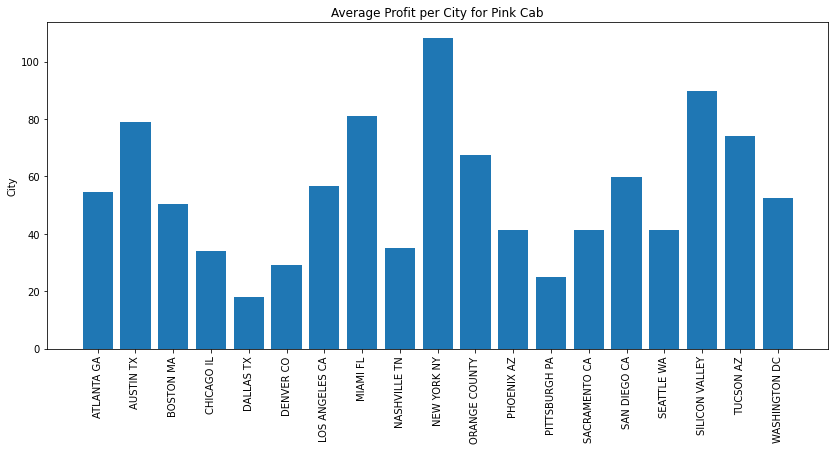

In [55]:
yellow_cab = masterdata[masterdata.Company.isin(['Yellow Cab'])]
pink_cab = masterdata[masterdata.Company.isin(['Pink Cab'])]
counts = yellow_cab.groupby(['City']).Profit.mean()
y_new = (yellow_cab.groupby("City").mean())
plt.figure(figsize = (14,6))
plt.bar(y_new.index,y_new["Profit"])
plt.xticks(rotation="90")
plt.ylabel("City")
plt.title("Average Profit per City for Yellow Cab")
plt.show()

counts = pink_cab.groupby(['City']).Profit.mean()
p_new = (pink_cab.groupby("City").mean())
plt.figure(figsize = (14,6))
plt.bar(p_new.index,p_new["Profit"])
plt.xticks(rotation="90")
plt.ylabel("City")
plt.title("Average Profit per City for Pink Cab")
plt.show()

<h4 style="color:green;">Above graphs represent City wise Profits and Profit Percentage trend</h4>